In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'car_data.csv')
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
data.isnull()

,User ID,Gender,Age,AnnualSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [4]:
data['Gender'].value_counts()
gender = {"Male": 0, "Female": 1}
data["Gender"] = data["Gender"].map(gender)
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
...,...,...,...,...,...
995,863,0,38,59000,0
996,800,1,47,23500,0
997,407,1,28,138500,1
998,299,1,48,134000,1


<AxesSubplot:>

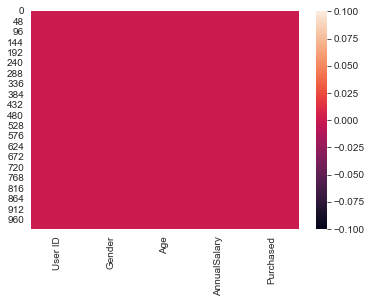

In [5]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='Purchased', ylabel='count'>

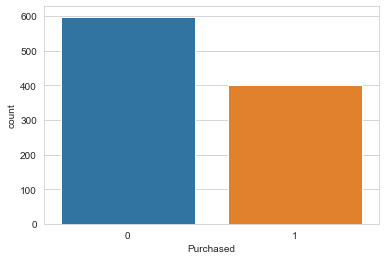

In [6]:
sns.countplot(x='Purchased',data=data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

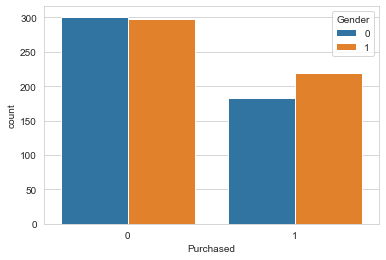

In [7]:
sns.countplot(x='Purchased',hue='Gender',data=data)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

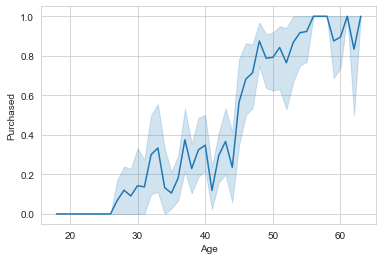

In [8]:
sns.lineplot(x='Age',y='Purchased',data=data)

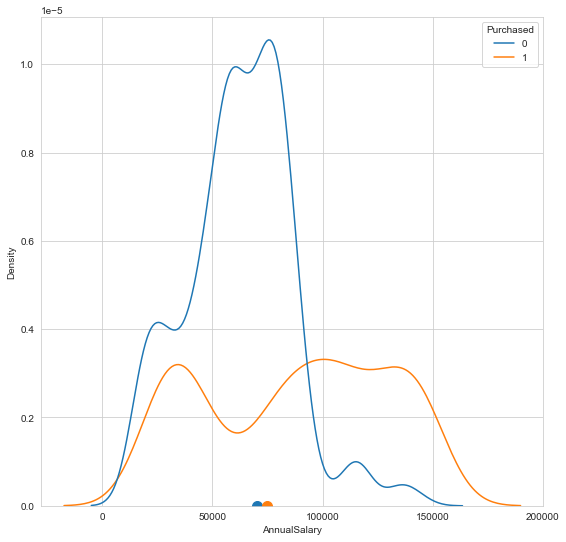

In [9]:
sal_mean_male = np.mean(data[data['Gender']==0]['AnnualSalary'].values)
sal_mean_fmale = np.mean(data[data['Gender']==1]['AnnualSalary'].values)
fig, ax = plt.subplots(figsize=(9,9))
sns.kdeplot(ax=ax, x=data['AnnualSalary'],hue=data['Purchased'])
ax.plot(sal_mean_male,0,marker='o',markersize=10)
ax.plot(sal_mean_fmale,0,marker='o',markersize=10)

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [11]:
X_=data.drop('User ID', axis=1)
X=X_.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
X = scalar.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.86      0.67      0.75       141

    accuracy                           0.81       330
   macro avg       0.82      0.79      0.80       330
weighted avg       0.82      0.81      0.81       330



In [16]:
confusion_matrix(y_test,y_pred)

array([[173,  16],
       [ 46,  95]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

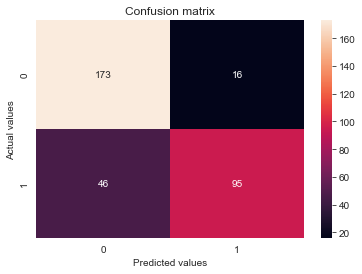

In [17]:
conf=confusion_matrix(y_test,y_pred)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X,y)

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size= 0.33, random_state=42)

In [21]:
lr1 = LogisticRegression()
lr1.fit(X_train1, y_train1)
y_predict1 = lr1.predict(X_test1)

In [22]:
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       204
           1       0.83      0.82      0.82       191

    accuracy                           0.83       395
   macro avg       0.83      0.83      0.83       395
weighted avg       0.83      0.83      0.83       395



Text(0.5, 1.0, 'Confusion matrix')

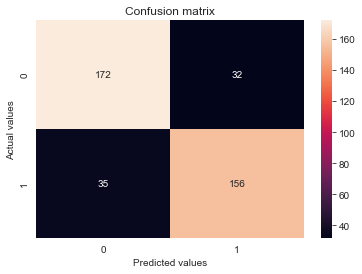

In [23]:
conf=confusion_matrix(y_test1,y_predict1)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")

In [37]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [38]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=3)

In [39]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [40]:
scores_log = []
scores_svm = []
scores_rf = []
scores_xgb = []

In [41]:
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test, y_train, y_test = X1[train_index], X1[test_index], y1[train_index], y1[test_index]
    scores_log.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test ))
    scores_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test ))
    scores_rf.append(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test ))
    scores_xgb.append(get_score(XGBClassifier(),X_train, X_test, y_train, y_test ))

In [42]:
print("Logistic Regression Scores:\n", scores_log)
print("SVM Scores:\n", scores_svm)
print("Random Forest Scores:\n", scores_rf)
print("XG Boost Scores:\n", scores_xgb)

Logistic Regression Scores:
 [0.8020050125313283, 0.8395989974937343, 0.7512562814070352]
SVM Scores:
 [0.8947368421052632, 0.9122807017543859, 0.907035175879397]
Random Forest Scores:
 [0.8872180451127819, 0.9122807017543859, 0.9296482412060302]
XG Boost Scores:
 [0.8771929824561403, 0.899749373433584, 0.9020100502512562]
